In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='index'>

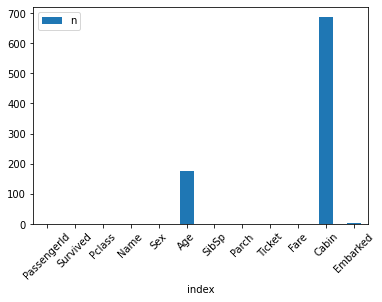

In [5]:
train_data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [6]:
train_data["Age"].fillna((train_data['Age'].mean()), inplace=True)
train_data["Embarked"].fillna((train_data["Embarked"].mode()[0]), inplace=True)
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
train_data["Fare"].fillna((train_data['Fare'].mean()), inplace=True)
test_data["Fare"].fillna((test_data['Fare'].mean()), inplace=True)
test_data["Age"].fillna((test_data["Age"].mean()), inplace=True)
test_data["Embarked"].fillna((test_data["Embarked"].mode()),inplace=True)
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

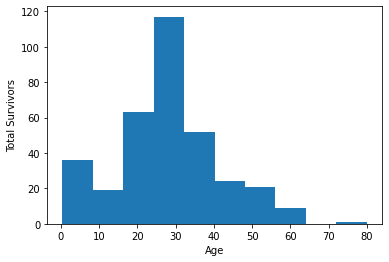

In [8]:
import matplotlib.pyplot as plt 
survivers = train_data[train_data["Survived"] == 1] 
plt.hist(x="Age",data= survivers)
plt.xlabel("Age")
plt.ylabel("Total Survivors")
plt.show()

In [9]:
labels = ["kid","teenager","young","middleage","old"]
bins = [0,10,20,40,50,90]
train_data["Agegroup"] = pd.cut(train_data["Age"],bins = bins , labels = labels , right = False)
test_data["Agegroup"] = pd.cut(test_data["Age"],bins = bins , labels = labels, right = False )

<AxesSubplot:xlabel='Agegroup', ylabel='Fare'>

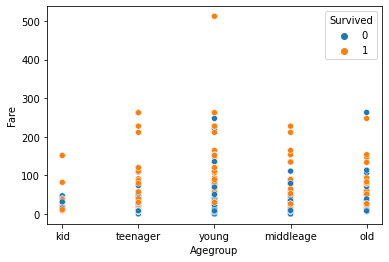

In [10]:
import seaborn as sns 
sns.scatterplot(x= "Agegroup", y = "Fare"  , hue = "Survived", data = train_data)

In [11]:
features = ["Pclass","Sex","SibSp","Parch","Agegroup","Fare","Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
X.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Agegroup_kid,Agegroup_teenager,Agegroup_young,Agegroup_middleage,Agegroup_old,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,1,0,0,1,0,0,0,0,1
1,1,1,0,71.2833,1,0,0,0,1,0,0,1,0,0
2,3,0,0,7.9250,1,0,0,0,1,0,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,0,0,0,0,1
4,3,0,0,8.0500,0,1,0,0,1,0,0,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not survive', 'survived']); ax.yaxis.set_ticklabels(['did not survive', 'survived'])

In [15]:
y = train_data["Survived"]

In [16]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [17]:
logreg_cv.score(X,y)

0.8114478114478114

In [18]:
predictions = logreg_cv.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data['PassengerId'].values, 'Survived': predictions})
output.to_csv('submission1.csv',index = False )
print("Your submission was successfuly saved")

Your submission was successfuly saved
